In [564]:
import hist
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants import boostHistHelpers as hh
from wremnants import histselections as sel
from wremnants import datasets2016
import lz4.frame
import pickle
hep.style.use(hep.style.ROOT)

In [565]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [566]:
with lz4.frame.open("../../mw_with_mu_eta_pt.pkl.lz4") as f:
    boost = pickle.load(f)

In [567]:
def readForDataset(output, name, histname="nominal"):
    if name not in output:
        raise ValueError(f"Sample {name} not in file")
    lumi = 1. if not "dataPostVFP" in output else output["dataPostVFP"]["lumi"]*1000
    info = output[name]
    scale = 1. if output[name]["dataset"]["is_data"] else \
                lumi*info["dataset"]["xsec"]/info["weight_sum"]
    print(scale)
    return info["output"][histname]*scale

In [568]:
def unrolledHist(h, obs=["pt", "eta"]):
    bins = np.multiply(*[len(a) for a in h.axes[:2]])
    newh = hist.Hist(hist.axis.Regular(bins, 0, bins), storage=hist.storage.Weight())
    newh[...] = np.ravel(h.project(*obs))
    return newh

In [569]:
def makeVariationPlot(chn, variations, obs, xlabel, rrange=[0.9, 1.1], scale=8.5e6):
    if type(variations) == str: variations = list(variations)
    width=3 if "unrolled" in obs else 1
    fig = plt.figure(figsize=(8*width,8))
    ax1 = fig.add_subplot(4, 1, (1, 3)) 
    ax2 = fig.add_subplot(4, 1, 4) 
    
    op = lambda x: x.project(obs) 
    if obs == "unrolled":
        op = unrolledHist

    hists  = [op(wgen[chn]['hist']['nominal']), *[op(wgen[chn]['hist']['vars'][x]) for x in variations]]
    colors = [wgen[chn]['color']['nominal'], *wgen[chn]['color']['vars']]
    labels = [wgen[chn]['label']['nominal'], *wgen[chn]['label']['vars']]
    
    hep.histplot(
        hists,
        histtype = "step",
        color = colors,
        label = labels,
        ax = ax1
    )
    

    hep.histplot(
        [hh.divideHists(x, hists[0]) for x in hists],
        histtype="step",
        yerr=False,
        color=colors,
        ax=ax2
    )
        
    ax1.set_xlabel("")
    ax2.set_xlabel(xlabel)
    ax1.set_ylabel("Events/bin")
    ax1.set_xticklabels([])
    xrange = [hists[0].axes[0].edges[0], hists[0].axes[0].edges[len(hists[0].axes[0])-1]]
    ax1.set_xlim(xrange)
    ax2.set_xlim(xrange)
    ax2.set_ylabel("variation/nominal", fontsize=22)
    ax2.set_ylim(rrange)
    ax1.set_ylim([0, scale])
    ax1.legend(prop={'size' : 20*(0.7 if width == 1 else 1.3)}, loc='upper right')

In [570]:
boost['WplusmunuPostVFP']['output'].keys()

dict_keys(['nominal', 'effStatTnP', 'effSystIsoTnP', 'muonL1PrefireStat', 'muonL1PrefireSyst', 'scetlibUnc', 'qcdScale', 'pdfNNPDF31', 'alphaS002NNPDF31', 'massWeight', 'muonScaleSyst'])

In [571]:
boost['WplusmunuPostVFP']['output']['nominal']

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  storage=Weight()) # Sum: WeightedSum(value=1.03665e+08, variance=1.2843e+08) (WeightedSum(value=1.19758e+08, variance=1.47162e+08) with flow)

In [572]:
boost['WplusmunuPostVFP']['output']['qcdScale']

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  Variable([0, 2.9, 4.7, 6.7, 9, 11.8, 15.3, 20.1, 27.2, 40.2, 13000], name='genPtV', label='genPtV'),
  Integer(0, 9, underflow=False, overflow=False, name='tensor_axis_0', label='tensor_axis_0'),
  storage=Weight()) # Sum: WeightedSum(value=9.26394e+08, variance=5.4568e+09) (WeightedSum(value=1.07169e+09, variance=5.76453e+09) with flow)

In [573]:
boost['WplusmunuPostVFP']['output']['massWeight']

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  Integer(0, 21, underflow=False, overflow=False, name='tensor_axis_0', label='tensor_axis_0'),
  storage=Weight()) # Sum: WeightedSum(value=2.17695e+09, variance=2.70168e+09) (WeightedSum(value=2.51492e+09, variance=3.0957e+09) with flow)

In [574]:
boost['WplusmunuPostVFP']['output']['muonScaleSyst']

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Boolean(name='passIso', label='passIso'),
  Boolean(name='passMT', label='passMT'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='downUpVar', label='downUpVar'),
  Regular(4, -2.4, 2.4, underflow=False, overflow=False, name='scaleEtaSlice', label='scaleEtaSlice'),
  storage=Weight()) # Sum: WeightedSum(value=9.83061e+08, variance=1.00298e+09) (WeightedSum(value=1.12637e+09, variance=1.14845e+09) with flow)

In [575]:
datagroups = {
    "Data" : dict(
        members = ["dataPostVFP"],
        color = "black",
        label = "Data",
        hist = {},
    ),
    "Fake" : dict(
        members = list(boost.keys()),
        label = "Nonprompt",
        color = "grey",
        hist = {},
    ),
    "Zmumu" : dict(
        members = ["ZmumuPostVFP"],
        label = r"Z$\to\mu\mu$",
        color = "lightblue",
        hist = {},
    ),   
    "Wtau" : dict(
        members = ["WminustaunuPostVFP", "WplustaunuPostVFP"],
        label = r"W$^{\pm}\to\tau\nu$",
        color = "orange",
        hist = {},
    ),
    "W" : dict(
        members = ["WminusmunuPostVFP", "WplusmunuPostVFP"],
        label = r"W$^{\pm}\to\mu\nu$",
        color = "darkred",
        hist = {},
    ),
    "Ztt" : dict(
        members = ["ZtautauPostVFP"],
        label = r"Z$\to\tau\tau$",
        color = "darkblue",
        hist = {},
    ), 
    "Top" : dict(
        members = ["TTSemileptonicPostVFP", "TTLeptonicPostVFP"],
        label = "Top",
        color = "green",
        hist = {},
    ), 
    "Diboson" : dict(
        members = ["WWPostVFP"],
        label = "Diboson",
        color = "pink",
        hist = {},
    ), 
}


variations = ['qcdScale', 'pdfNNPDF31', 'muonScaleSyst', 'massWeight']
variation_labels = ['QCD Scale', 'NNPDF31', 'Muon Scale Down, 1st eta bin', 'massShift100MeV']
variation_colors = ['red', 'green', 'blue', 'cyan']

wgen = {
    'WminusmunuPostVFP': dict(
        label = {
            'nominal': r'$W^{-}$ nominal',
            'vars': [r'$W^{-}$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'black',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    ),
    'WplusmunuPostVFP': dict(
        label = {
            'nominal': r'$W^{+}$ nominal',
            'vars': [r'$W^{+}$ ' + x for x in variation_labels]
        },
        color = {
            'nominal': 'black',
            'vars': variation_colors
        },
        hist = {
            'nominal': None,
            'vars': {}
        }
    )
}


for chn, v in wgen.items():
    try:
        h_nominal = readForDataset(boost, chn)
    except ValueError as e:
        print(e)
        continue
    v['hist']['nominal'] = h_nominal
    v['hist']['nominal'] = sel.signalHistWmass(v['hist']['nominal'])
    
    for var in variations:
        try:
            h_var = readForDataset(boost, chn, histname = var)
        except ValueError as e:
            print(e)
            continue
        if 'pdf' in var:
            v['hist']['vars'][var] = h_var[...,1] #get the first var set after nominal
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])
        elif 'qcd' in var:
            v['hist']['vars'][var] = h_var[...,0]
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])
        elif 'muonScale' in var:
            v['hist']['vars'][var] = h_var[...,0,0] #[down, 2nd_eta_bin]
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])
        elif 'massWeight' in var:
            v['hist']['vars'][var] = h_var[...,20] #for 100 MeV mass shift
            v['hist']['vars'][var] = sel.signalHistWmass(v['hist']['vars'][var])           

0.7361441792334525
0.7361441792334525
0.7361441792334525
0.7361441792334525
0.7361441792334525
0.560186807337461
0.560186807337461
0.560186807337461
0.560186807337461
0.560186807337461


In [576]:
#data

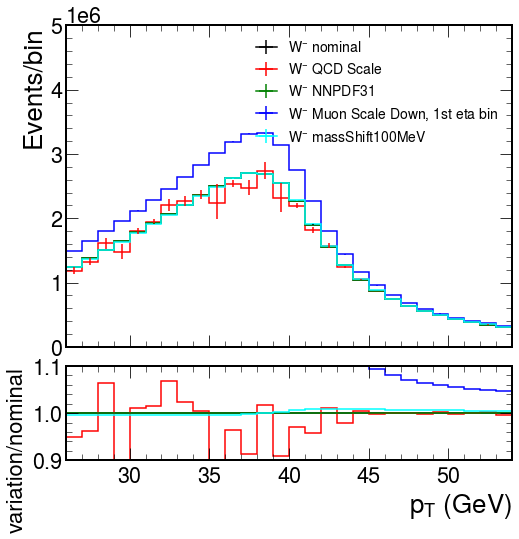

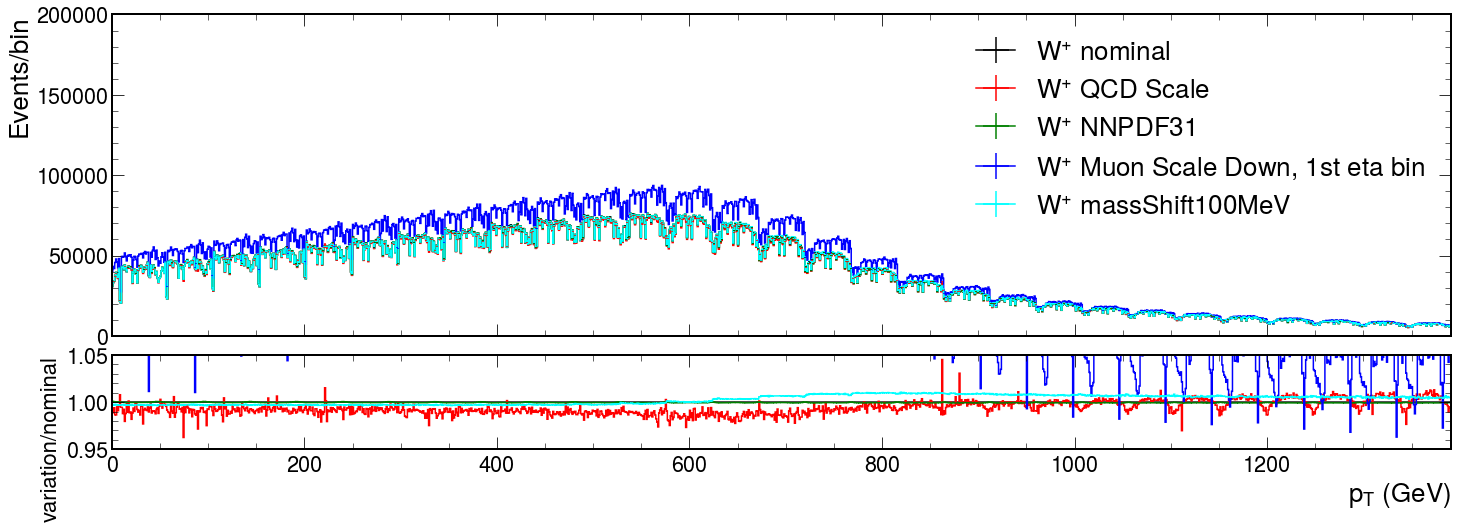

In [577]:
makeVariationPlot('WminusmunuPostVFP', variations, "pt", xlabel=r"p$_{T}$ (GeV)", rrange=[0.9, 1.1], scale=5e6)
makeVariationPlot('WplusmunuPostVFP', variations, "unrolled", xlabel=r"p$_{T}$ (GeV)", rrange=[0.95, 1.05], scale=2e5)
